# Práctica de aprendizaje automático (parte 2)

Entrega este cuaderno habiendo **ejecutado todas las celdas**. Incluye en la entrega **todos los ficheros necesarios para su ejecución**.

Asegúrate de que la presentación está bien estructurada: Se valorará la **claridad, concisión, y completitud** del informe.

Se trata de una práctica abierta: **sé intrépido y explora**. 

# Construcción de clasificadores en bases de datos sintéticas (2 puntos)

In [1084]:
# Fuente:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [1085]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [1086]:
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

def plot_classifiers(classifiers, datasets):
    
    figure = plt.figure(figsize=(4*6, 4*4))
    h = .02  # step size in the mesh
    i = 1
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
        # preprocess dataset, split into training and test part
        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                            test_size=.4,
                                                            random_state=42)
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        
        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        if ds_cnt == 0:
            ax.set_title("Input data", fontsize=24)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
                   edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1
        
        # iterate over classifiers
        for name, clf in classifiers:
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            
            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, x_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
            
            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                       edgecolors='k')
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       edgecolors='k', alpha=0.6)
            
            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_cnt == 0:
                ax.set_title(name, fontsize=24)
            ax.text(xx.max() - .3, yy.min() + .3, ('Score test: %.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1
    
    plt.tight_layout()
    plt.show()

In [1087]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X @ np.asarray([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

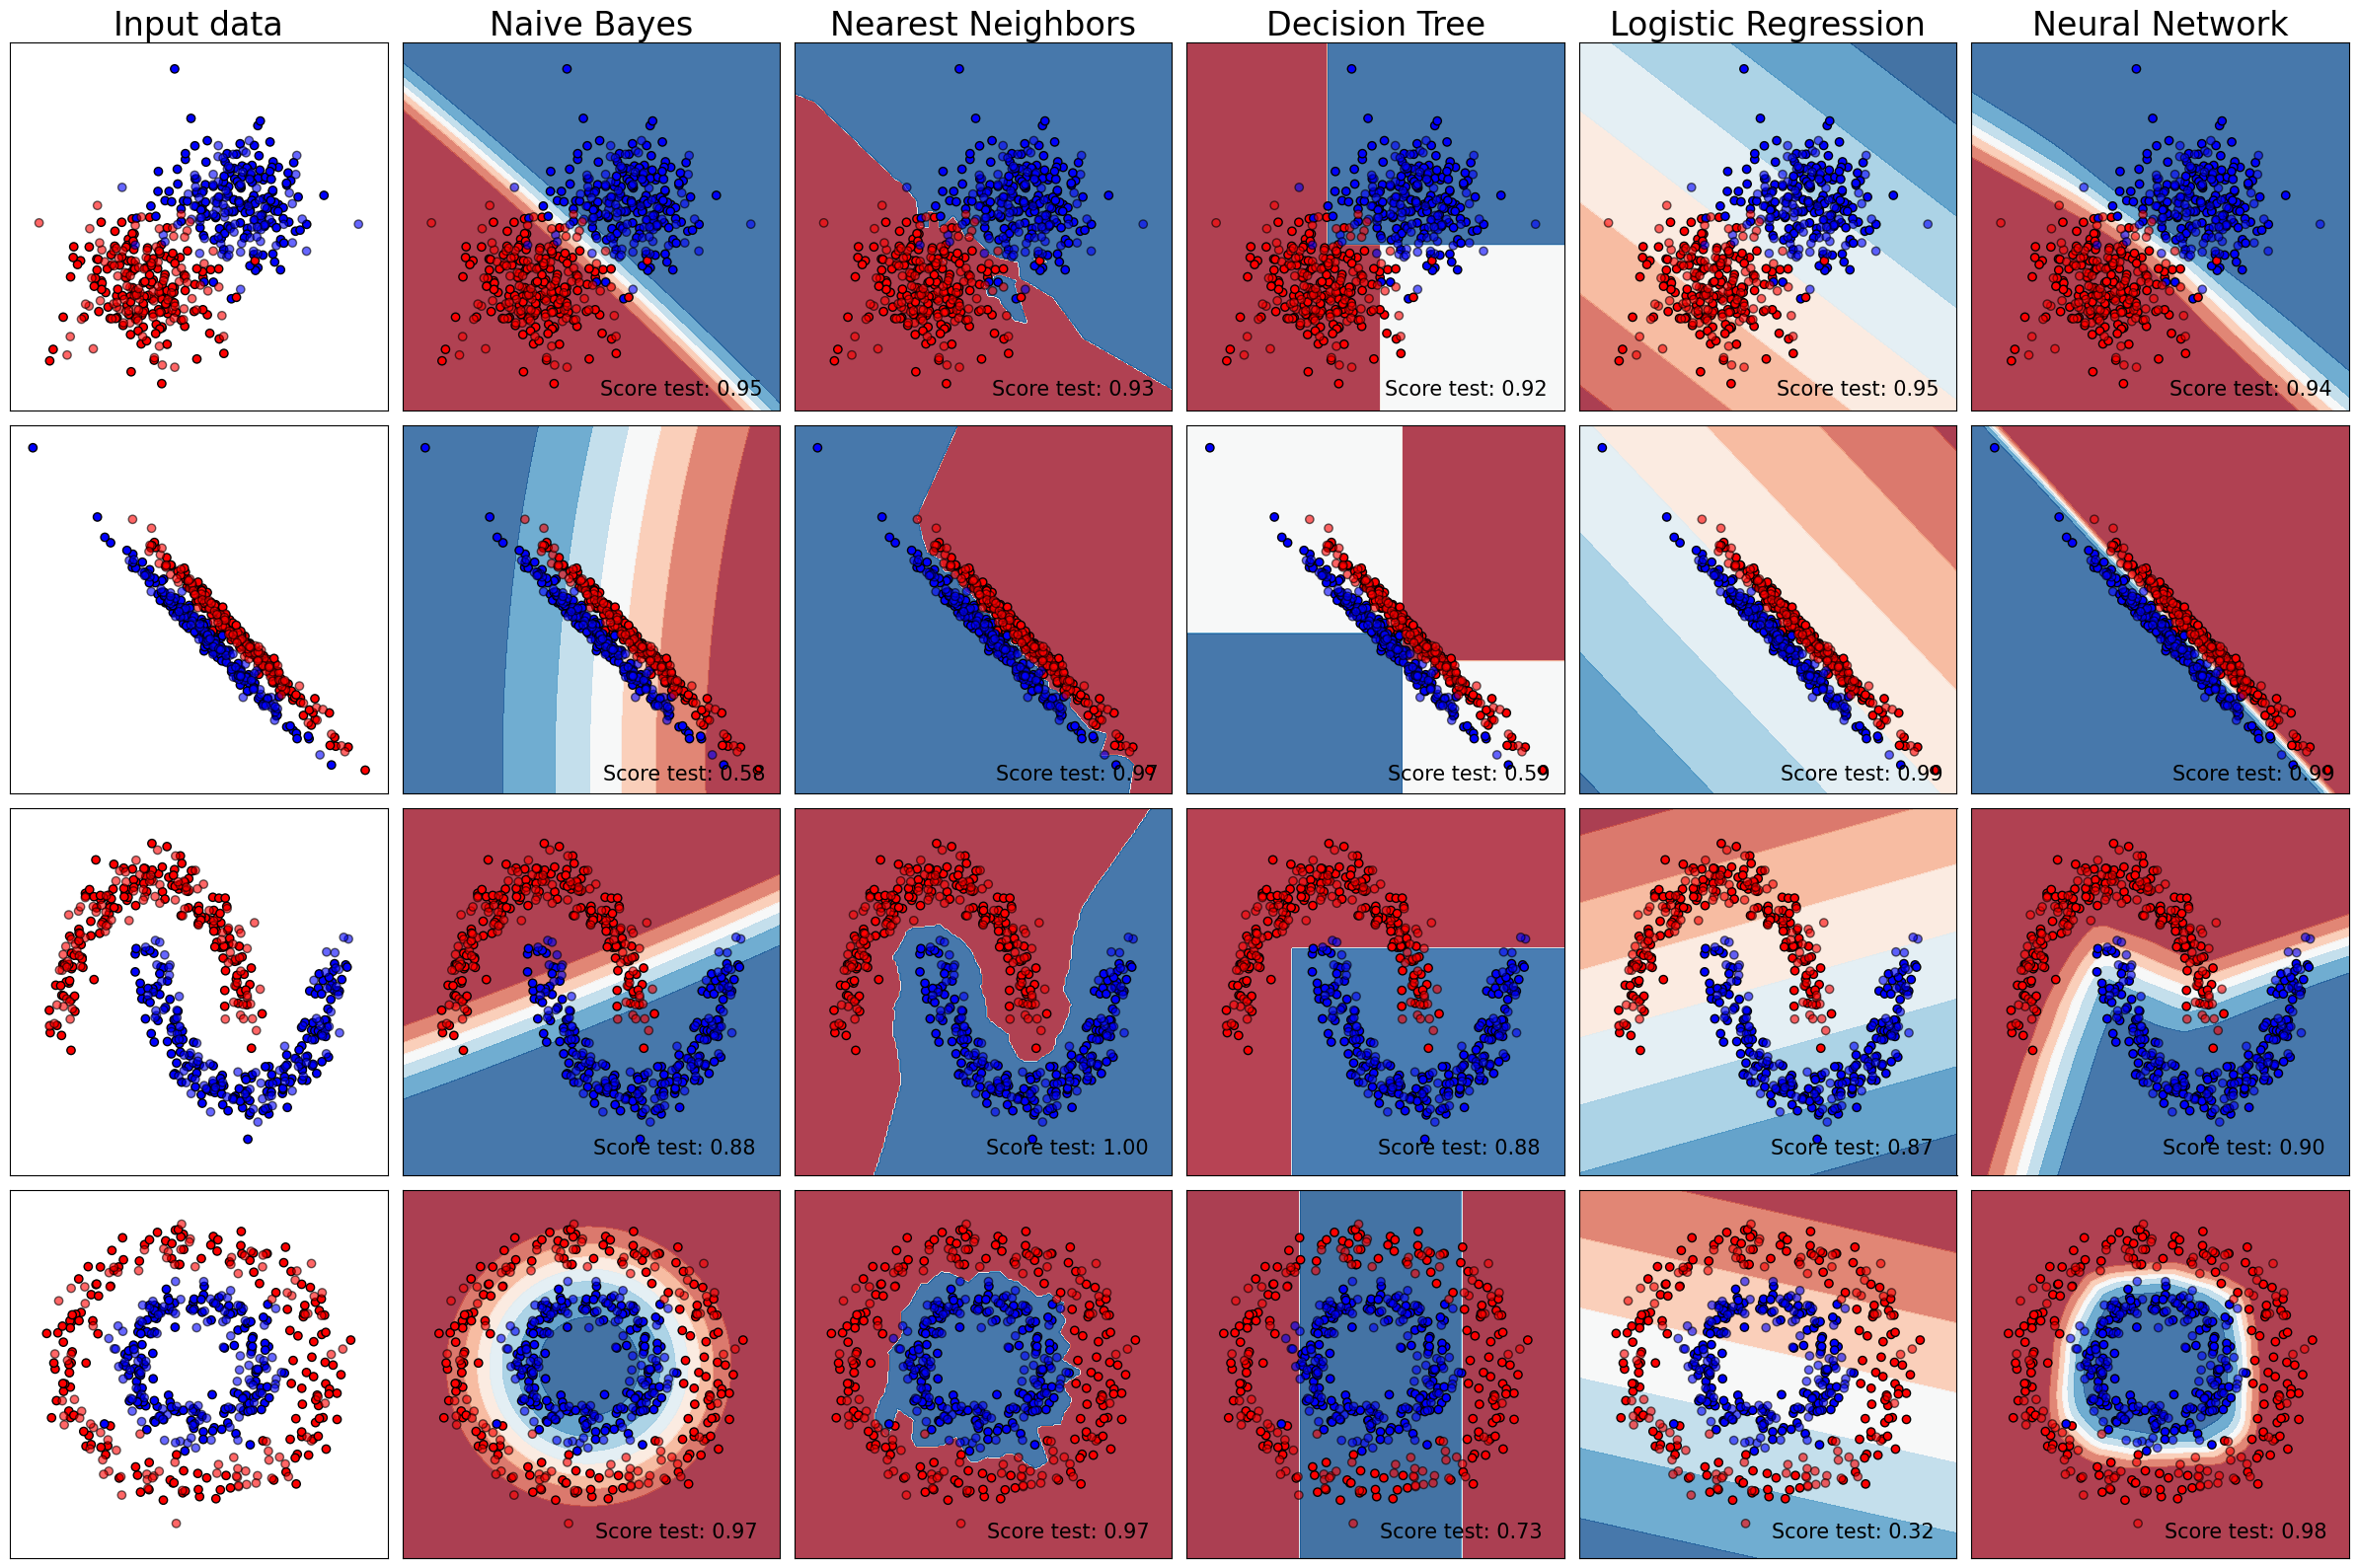

In [1088]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors= 1)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=2)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=1.0e10, solver='lbfgs')), 
               # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=500,
                              alpha=0.0))]

plot_classifiers(classifiers, datasets)

In [1089]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB()
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(criterion='entropy', max_depth=2)
LogisticRegression(C=10000000000.0)
MLPClassifier(alpha=0.0, hidden_layer_sizes=(50,), max_iter=500)


1. **Describe las características de los datos:**
    * Número de ejemplos de cada una de las clases.
    * Número y tipo (nominales no ordenados, nominales ordenados, numéricos) de atributos.
    * Tamaño de los conjuntos de entrenamiento y test.

1. **Solución pregunta 1:**
* Número de ejemplos de cada una de las clases.  

  * En total hay 500 ejemplos y hay 2 clases, con 250 ejemplos en cada clase.
* Número y tipo (nominales no ordenados, nominales ordenados, numéricos) de atributos.
  * Hay 2 atributos y ambos son numéricos.
* Tamaño de los conjuntos de entrenamiento y test.
  * X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.4,random_state=42)
  * Con este trozo de código se puede determinar que el 40% de ejemplos están dedicados al test y otros 60% se dedican al entrenamiento.
  * Como en total hay 500 ejemplos, entonces 300 son entremamiento y 200 son test.

2. **Prueba a cambiar los siguientes parámetros (al menos 3-5 variantes en cada caso), observa las consecuencias en la frontera de clasificación construida y explica los resultados:**

   * Número de vecinos en k-nn. 
      * ¿Debería ser impar cuando hay dos clases? Justifica la respuesta.
      * ¿Debería ser impar cuando hay más de dos clases? Justifica la respuesta.
   * Profundidad máxima de los árboles de decisión.
   * Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. **Nota:** (50,) indica una única capa oculta con 50 neuronas. (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente. (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.
   
**Ayudate de gráficas y tablas en tus explicaciones.**

**Para comparar de forma efectiva los métodos, recuerda incluir las barras de error en las gráficas y el error estándar en las tablas.**

2. **Solución del ejercicio 2:**
* Número de vecinos en k-nn:


    * Caso simple_data_set:
      * Para este apartado, se ha probado los valores [1,25].
    
        Para k pertenece [1-5]. Obtenemos el resultado del test entorno de 0.92 a 0.95. Esto quiere decir que tenemos una frontera regular con sobreajuste.

        Para k pertenece [6-24]. Tendremos los resultado más estables alternando 0.95 cuando k es par y 0.96 en k impar, en la mayoría de las veces. Esto se debe a la distribución de las muestras que el programa se duda en casos de empates.

        Para k > 24. El resultado del test ya empieza a subajustar, el resultado empieza a decrecer a 0.94.


    * Caso linearly_separable:
      * Para este caso, con k pertenece rango [2,10], se alcanza al score máximo que es 0.98, con k = 1 obtenemos 0.97 y k > 10 obtenemos 0.96 y continua decreciendo el score si aumentamos k.


    * Caso moons:
      * Para este caso, con k < 15, el resultado del test es 1.0, si k supera a 15, el resultado del test ya empieza a subasjustar.


    * Caso circle:
      * Para este caso, en k pertenece intervalos [5,7], alcanza el valor máximo del test (0.99), y rangos [1,4] se resultado crece de 0.97 a 0.98 y si k es mayor que 8, el resultado empieza a subajustar.


  * ¿Debería ser impar cuando hay dos clases? Justifica la respuesta.


    * No es obligatorio pero es recomendable. Porque cuando k es impar, evita significativamente el caso de empate. Ya que con k es impar (0.96) tenemos resultados más altos frente k es par (0.95). 
    
      Por otra parte, no es obligatorio porque cuando se trata de un problema binario, se proporciona formas de evaluar para solucionar en empate.




  * ¿Debería ser impar cuando hay más de dos clases? Justifica la respuesta.


    * Sí, cuando hay más de dos clases, es esencial que k sea impar. Por que cuando hay más clases, la probalidad para el caso de empate se aumenta significativamente. Una manera de solucionar esto es tomar k impar.


* Profundidad máxima de los árboles de decisión.


  * La profundidad máxima del árbol de decisión para simple_dataset es 3, que ha obtenido el resultado más alto, en este caso, 0.93.


  * La profundidad máxima del árbol de decisión para linearly_separable es 7,a partir de este valor, el resultado del test (0.93) no varía.


  * La profundidad máxima del árbol de decisión para moons es 5,a partir de este valor, el resultado del test (0.95) no varía.


  * La profundidad máxima del árbol de decisión para circle es 12 con score = 0.94, cuando el profundidad es menor que este valor el score es menor o igual a 0.93 y cuando profundidad es mayor que 20 empieza a haber sobreajustes, el score empieza a decrementar.
 * Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. 
    * Con 1 capas oculta con (50,) neuronas respectivamente alcanza el resultado óptimo, si aumentamos el red neuronal a 100 hay un sobreajuste y si reducimos a 25 hay un subajuste.


    * El máximo número de épocas de entrenamiento es 500. A partir de este número, el resultado empieza a converger, el resultado obtenido con 1000 iteraciones es idéntico al de 500. 

3. **Proporciona una recomendación final:**
    * Tipo de clasificador.
    * Configuración del clasificador (arquitectura, hiperparámetros, etc.)
    * Para el predictor final, proporciona los errores de entrenamiento, validación cruzada y test.

In [1090]:
classifiers_final = [("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,),
                              max_iter=500,
                              alpha=0.0))]

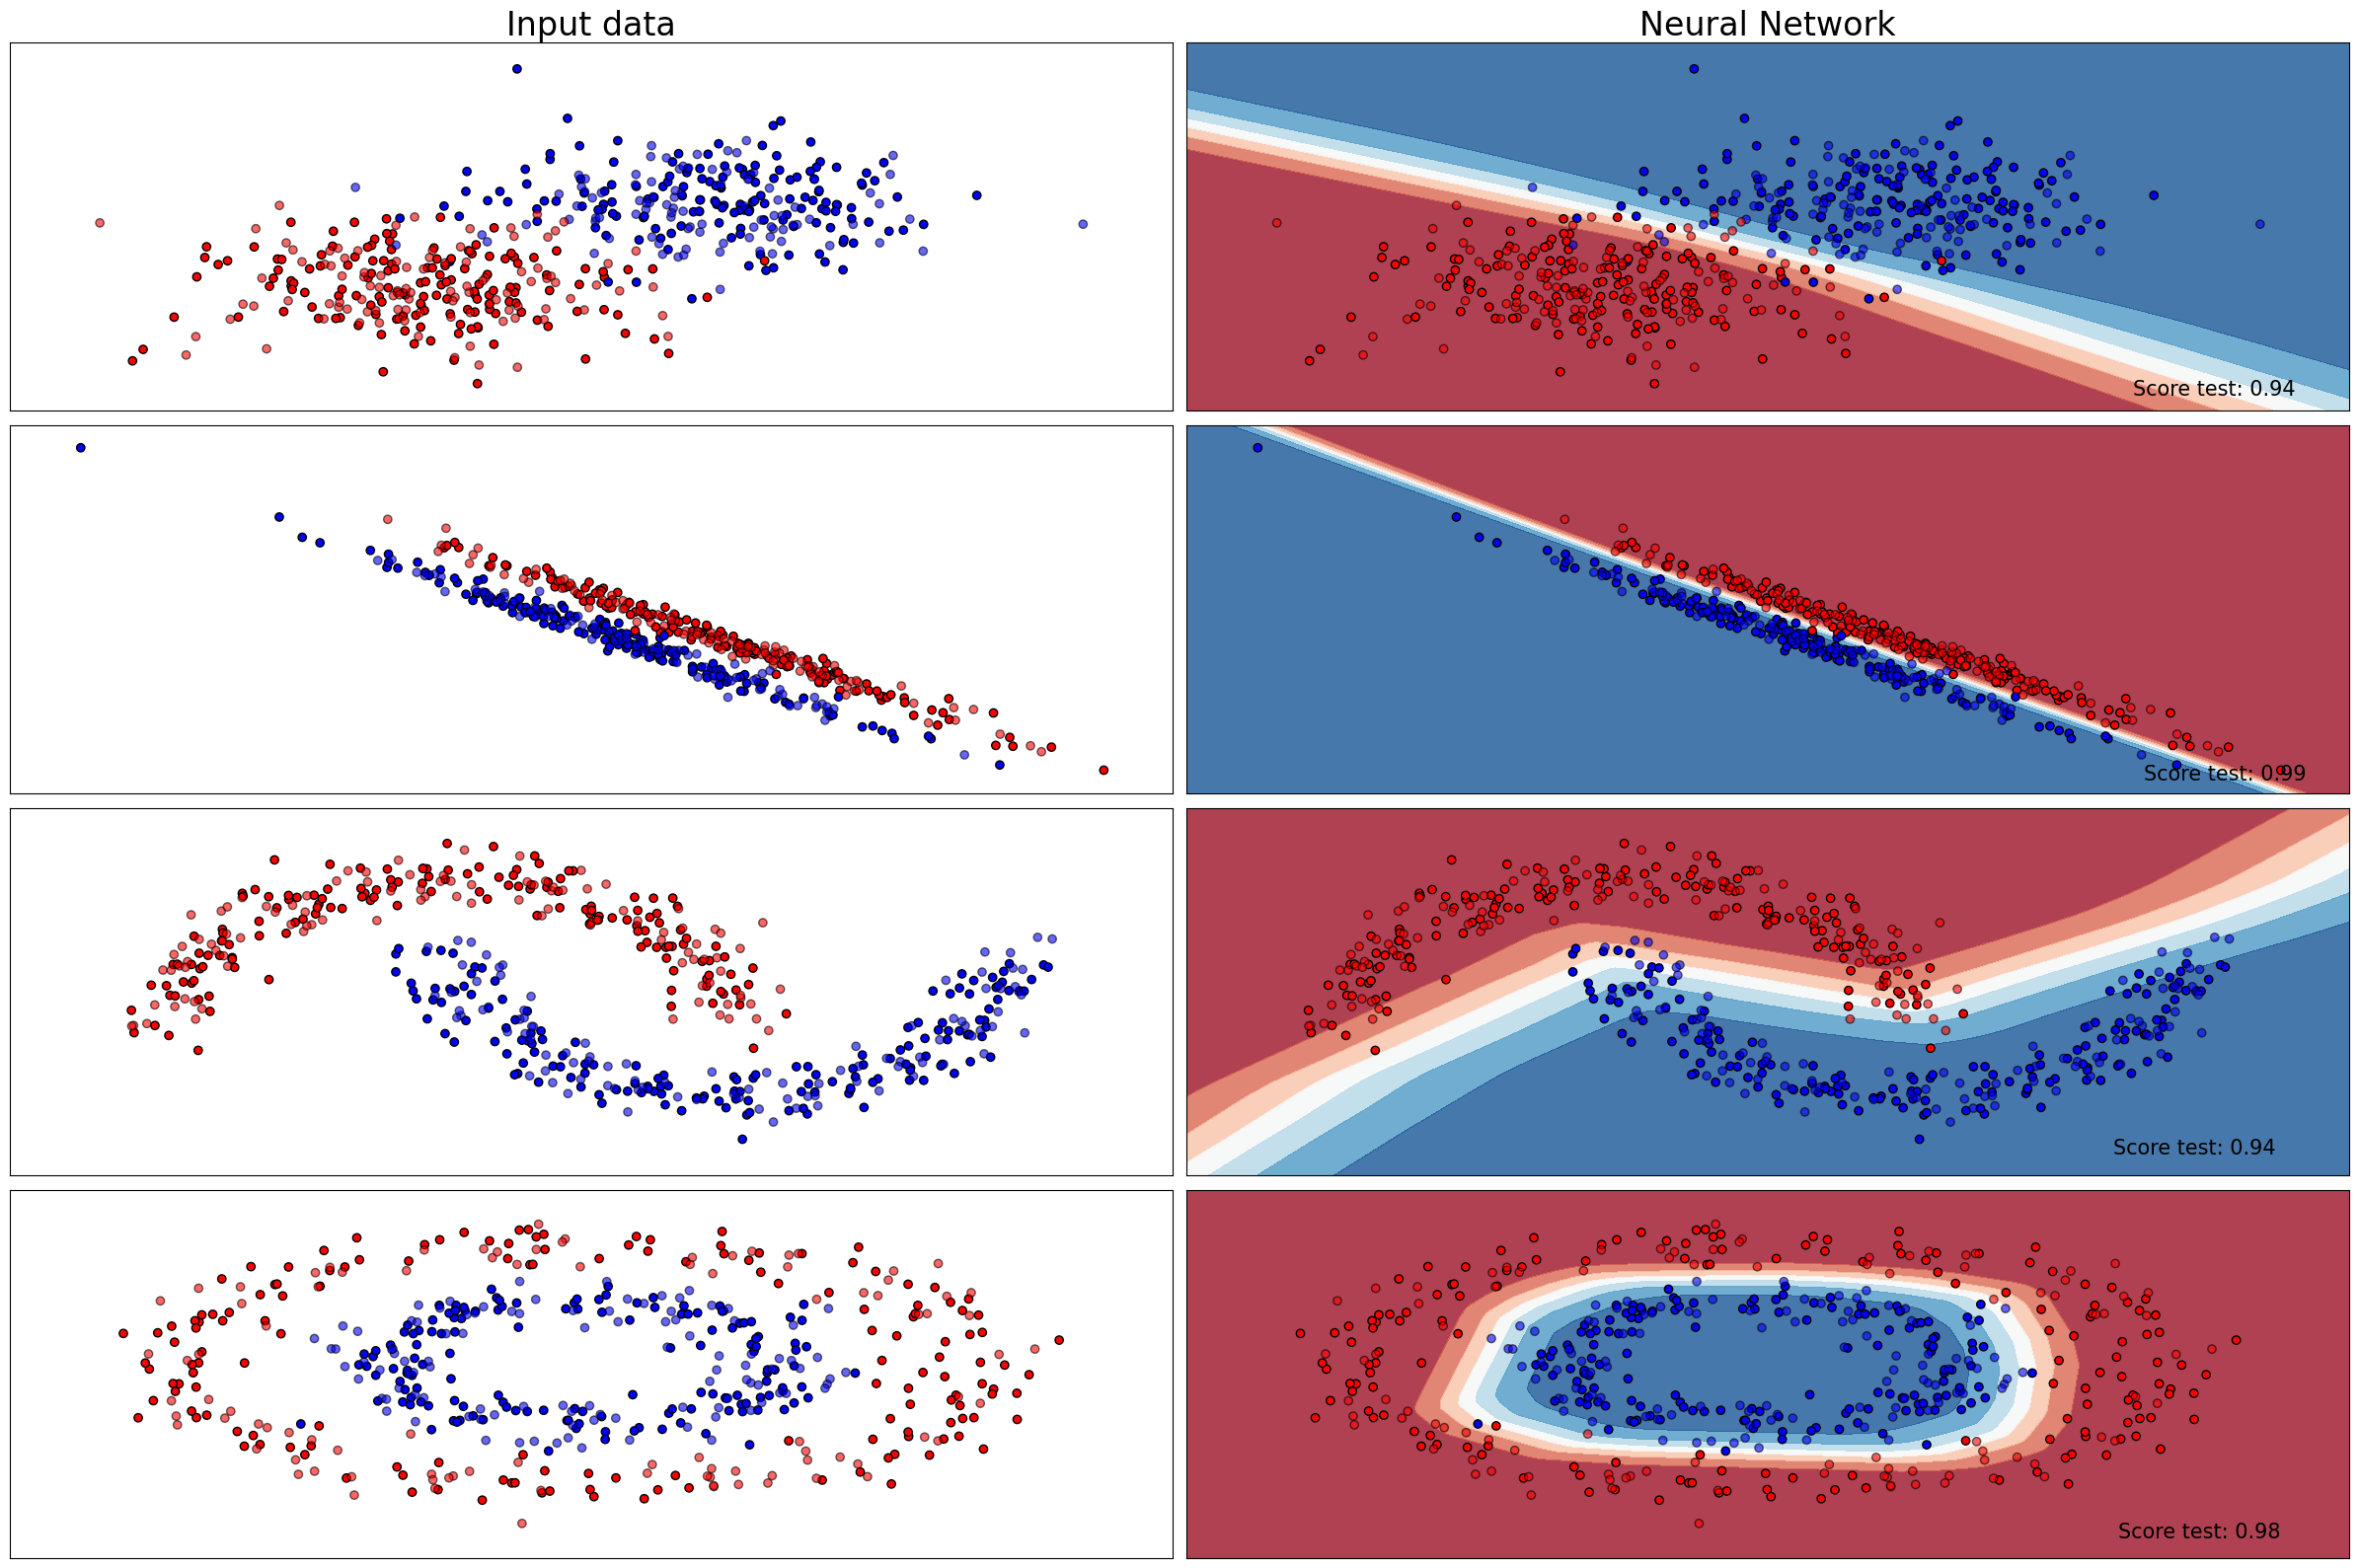

In [1091]:
plot_classifiers(classifiers_final, datasets)

In [ ]:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

datasets = [
    ("1. Simple Blobs", simple),
    ("2. Linearly Sep", linearly_separable),
    ("3. Moons", make_moons(noise=0.1, random_state=0, n_samples=500)),
    ("4. Circles", make_circles(noise=0.1, factor=0.5, random_state=1, n_samples=500))
]

def obtener_resultados_estadisticos(dataset_name, X, y, n_repeticiones=5):
    """
    Obtiene errores de train, CV y test con estadísticas
    """
    errores_train, errores_cv, errores_test = [], [], []
    
    for rep in range(n_repeticiones):
        #tipificacion
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(
            X_scaled, y, test_size=0.4, random_state=rep*10
        )
        
        clf = MLPClassifier(
            hidden_layer_sizes=(50,),
            max_iter=500,
            alpha=0.0,
            random_state=rep*100
        )
        
        clf.fit(X_train, y_train)
        
        #calcula porcentaje de error
        error_train = 1 - accuracy_score(y_train, clf.predict(X_train))
        error_test = 1 - accuracy_score(y_test, clf.predict(X_test))
        
        cv_scores = cross_val_score(
            MLPClassifier(
                hidden_layer_sizes=(50,),
                max_iter=500,
                alpha=0.0,
                random_state=rep*1000
            ),
            X_scaled, y, cv=5, scoring='accuracy'
        )
        error_cv = 1 - cv_scores.mean()
        
        errores_train.append(error_train * 100)
        errores_cv.append(error_cv * 100)
        errores_test.append(error_test * 100)
    
    return {
        'Dataset': dataset_name,
        'Train_Mean': np.mean(errores_train),
        'Train_Std': np.std(errores_train),
        'CV_Mean': np.mean(errores_cv),
        'CV_Std': np.std(errores_cv),
        'Test_Mean': np.mean(errores_test),
        'Test_Std': np.std(errores_test)
    }

resultados = []
for dataset_name, dataset in datasets:
    X, y = dataset
    stats = obtener_resultados_estadisticos(dataset_name, X, y, n_repeticiones=5)
    resultados.append(stats)

df = pd.DataFrame(resultados)
print("="*80)
print("RESUMEN DE ERRORES (%)")
print("="*80)
print("                  Entrenamiento       Validación Cruzada     Test")
print("Dataset           Mean ± Std          Mean ± Std             Mean ± Std")
print("-"*80)

for _, row in df.iterrows():
    print(f"{row['Dataset']:15} "
          f"{row['Train_Mean']:5.1f} ± {row['Train_Std']:4.1f}        "
          f"{row['CV_Mean']:5.1f} ± {row['CV_Std']:4.1f}           "
          f"{row['Test_Mean']:5.1f} ± {row['Test_Std']:4.1f}")

promedios = {
    'Train_Mean': df['Train_Mean'].mean(),
    'Train_Std': df['Train_Std'].mean(),
    'CV_Mean': df['CV_Mean'].mean(),
    'CV_Std': df['CV_Std'].mean(),
    'Test_Mean': df['Test_Mean'].mean(),
    'Test_Std': df['Test_Std'].mean()
}

print("-"*80)
print(f"{'PROMEDIO TOTAL':15} "
      f"{promedios['Train_Mean']:5.1f} ± {promedios['Train_Std']:4.1f}        "
      f"{promedios['CV_Mean']:5.1f} ± {promedios['CV_Std']:4.1f}           "
      f"{promedios['Test_Mean']:5.1f} ± {promedios['Test_Std']:4.1f}")

RESUMEN DE ERRORES (%)
                  Entrenamiento       Validación Cruzada     Test
Dataset           Mean ± Std          Mean ± Std             Mean ± Std
--------------------------------------------------------------------------------
1. Simple Blobs   3.3 ±  0.8          3.6 ±  0.3             4.0 ±  1.0
2. Linearly Sep   0.7 ±  0.3          1.0 ±  0.0             1.3 ±  0.7
3. Moons          3.5 ±  0.8          4.0 ±  0.7             2.3 ±  0.9
4. Circles        0.4 ±  0.3          1.3 ±  0.1             1.1 ±  0.8
--------------------------------------------------------------------------------
PROMEDIO TOTAL    2.0 ±  0.6          2.5 ±  0.3             2.2 ±  0.9
